# Adult Data Cnsus Income Prediction


### 1. Importing requirement Libraries


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
from sklearn.preprocessing import LabelEncoder

color = sns.color_palette()


%matplotlib inline

import warnings
warnings.filterwarnings(action = "ignore")

#### Importing data from file

In [47]:
df = pd.read_csv(r"D:\Intern projects\ML_Internship_Project__Adult_Census_Income_Prediction\Adult_Census_Income_Data\adult.csv")

### 2. Exploratory Data Analysis

In [48]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
# Shape of the dataset
df.shape

(32561, 15)

#### 3. Data Cleaning

In [52]:
# For checking the null values in dataset
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

So there is no null values in dataset


In [53]:
# Lets check duplicate values in dataset
df.duplicated().sum()

24

In [54]:
# Lets remove the duplicate values
df.drop_duplicates(inplace=True)

In [55]:
# Let's check any remaining duplicate values
df.duplicated().sum()

0

So no more duplicate values in our dataset

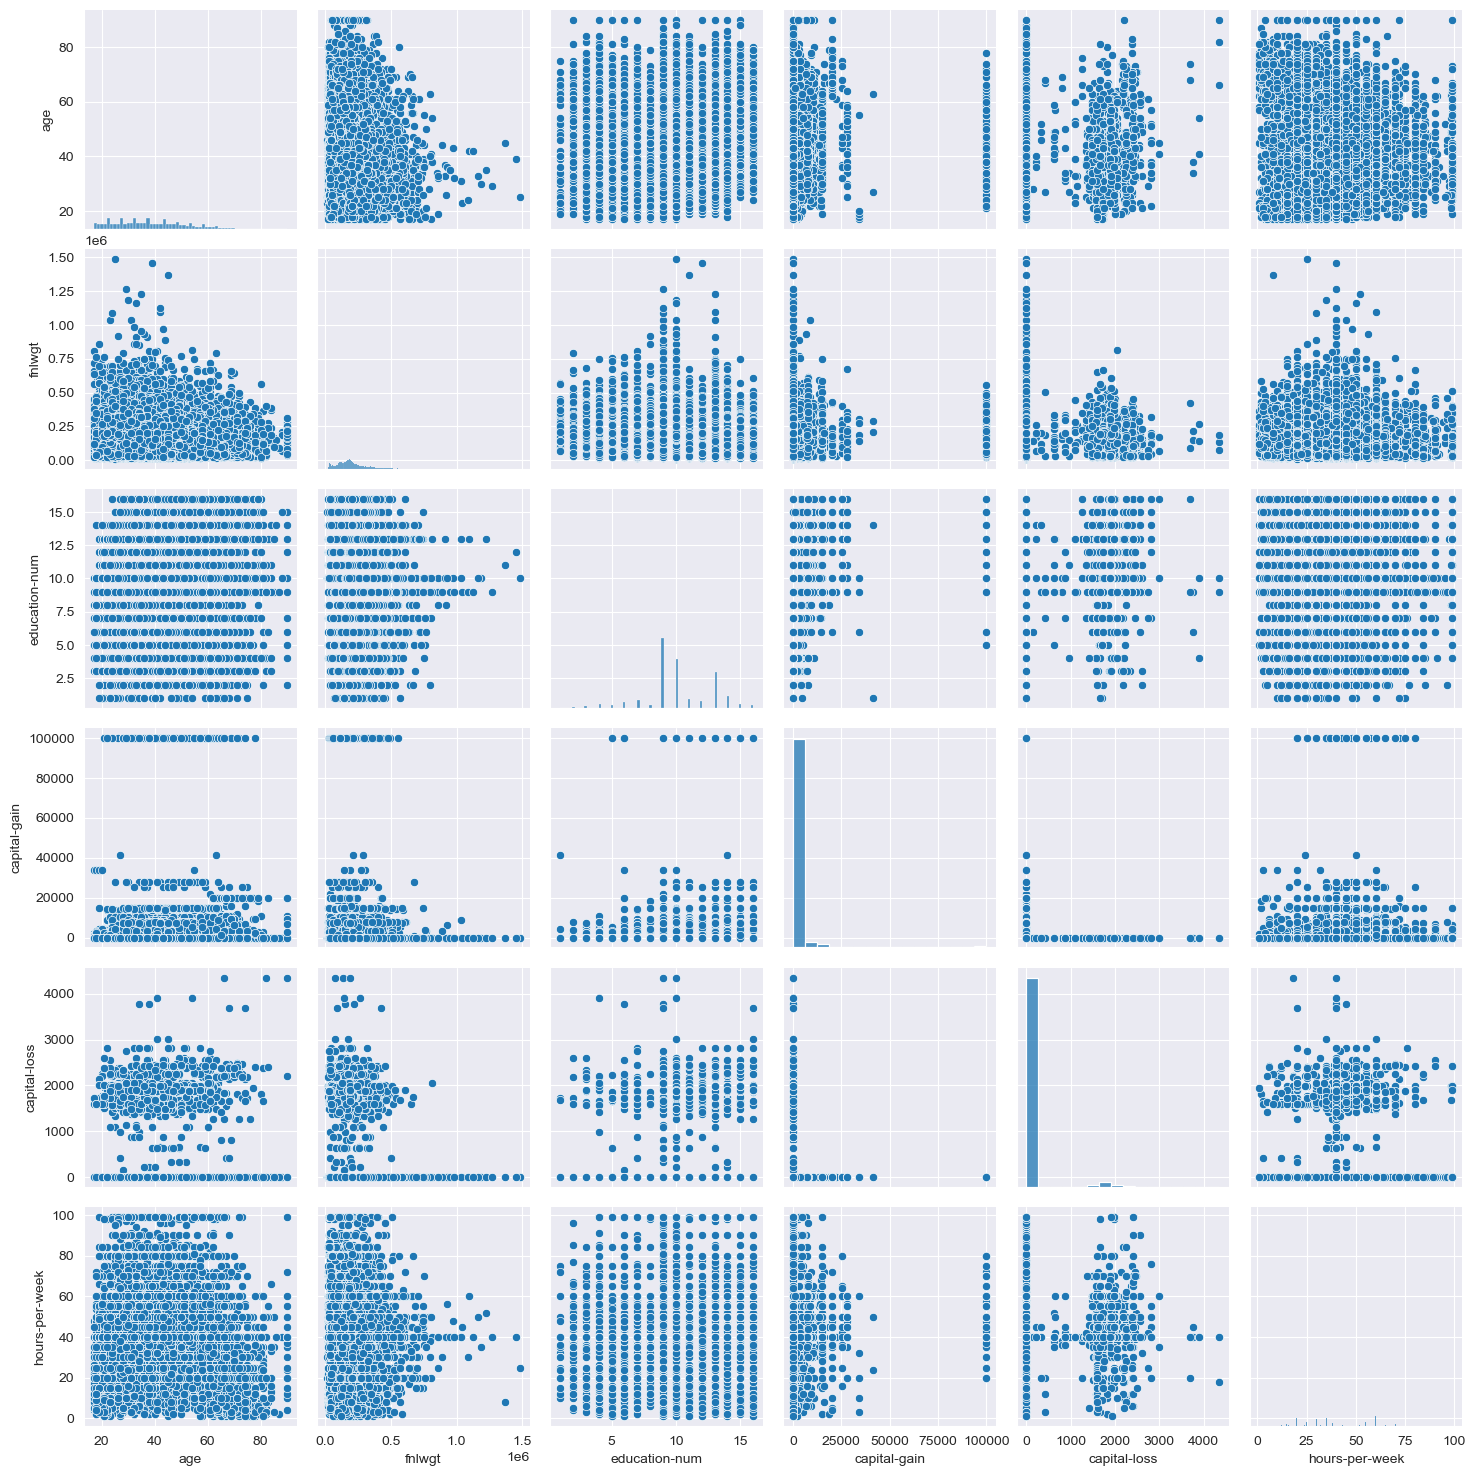

In [56]:
#Lets analyze hwo the distribution is statistically through pair plots and several plots

sns.pairplot(data= df)

In [57]:
for i in df.columns:
    print(i ,":\n", df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

We observe that in 'Workclass', 'Occupation' and 'Country' has '?' means None

#### Amount of wrong values in Dataset

In [58]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) +': '+ str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 582 records


#### Visualizing each column to make a fill in the correct values

In [59]:
print(df['workclass'].value_counts(),'\n')
print(df['occupation'].value_counts(),'\n')

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64 



In [60]:
df['country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [61]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

In [62]:
df.shape

(30139, 15)

In [63]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [64]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [65]:
df['salary'].value_counts()

 <=50K    22633
 >50K      7506
Name: salary, dtype: int64

In [66]:
income_all = df['salary'].value_counts(normalize = True)
income_all*100

 <=50K    75.095391
 >50K     24.904609
Name: salary, dtype: float64

In [67]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

#### The data here is skewed because we have 75% of the data who has less than or equal to 50k salary, while around 25% people have more than 50 k salary

In [68]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [71]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


In [72]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    
    #calculating points of standard daviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df , x=col, bins=30, kde=True, color= 'dodgerblue')
    sns.lineplot(x=points, y=(0,0), color = 'black', label= "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    #Creating a Dataframe for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                  'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))

In [73]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(14,6))
    sns.countplot(data=df, x=col, color='dodgerblue', hue= 'salary', palette='nipy_spectral')
    plt.xticks(rotation = 45)
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

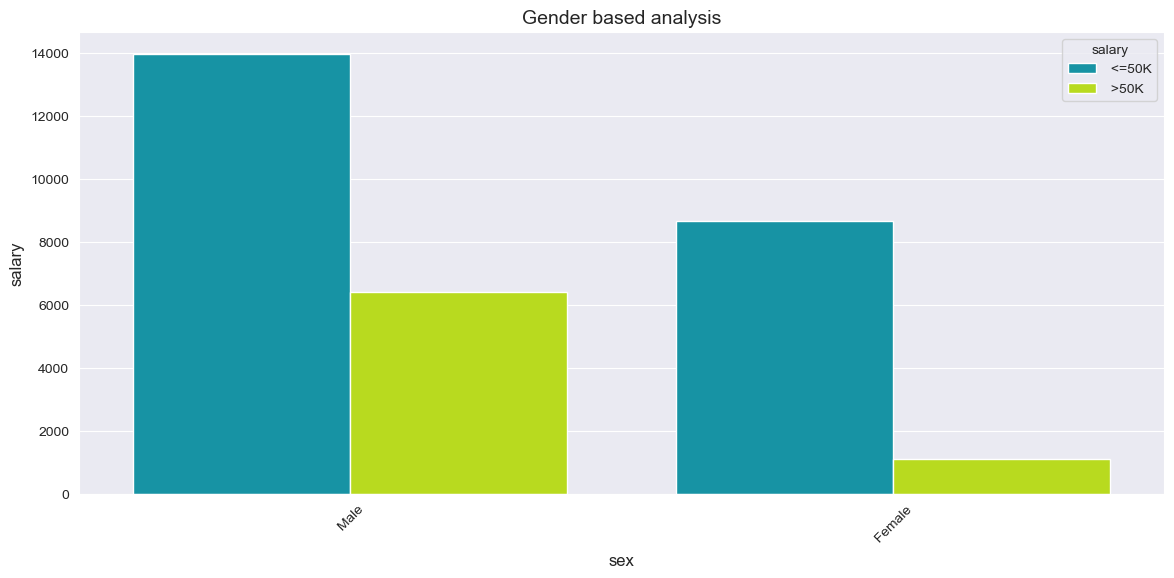

In [74]:
plot_cat(df, 'sex','sex','salary', 'Gender based analysis')

1. Most of the earning populations is male and has 70:30 chance of getting <= or > 50 k salary.
2. Females have 90:10 chance of getting <= or > 50 k salary.
Gender discrimination can clearly be seen.

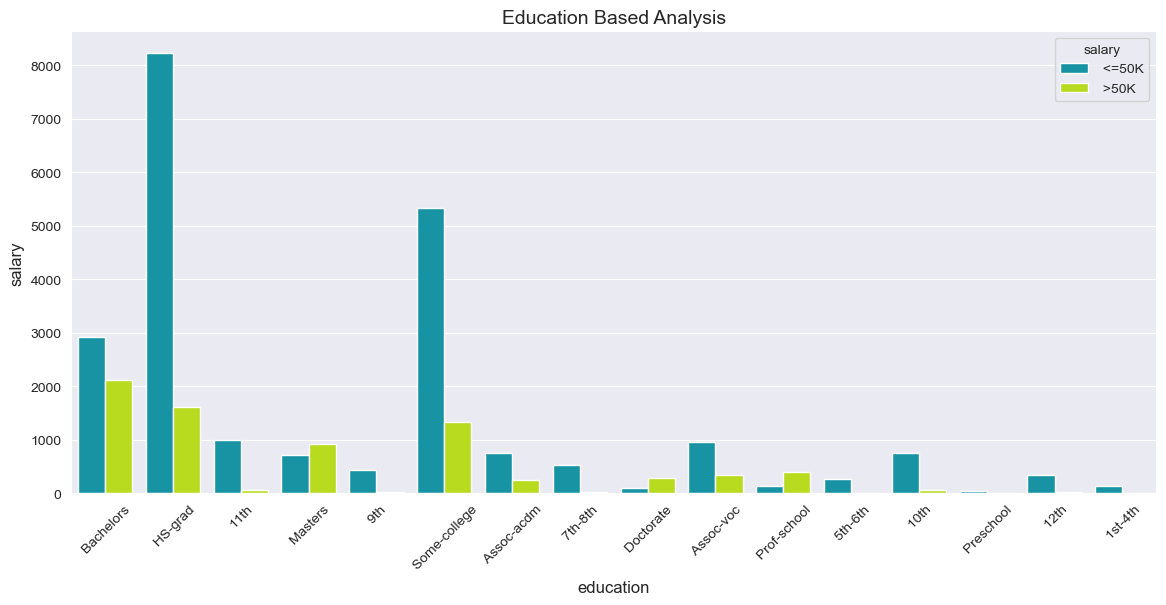

In [75]:
plot_cat(df,'education','education','salary','Education Based Analysis')

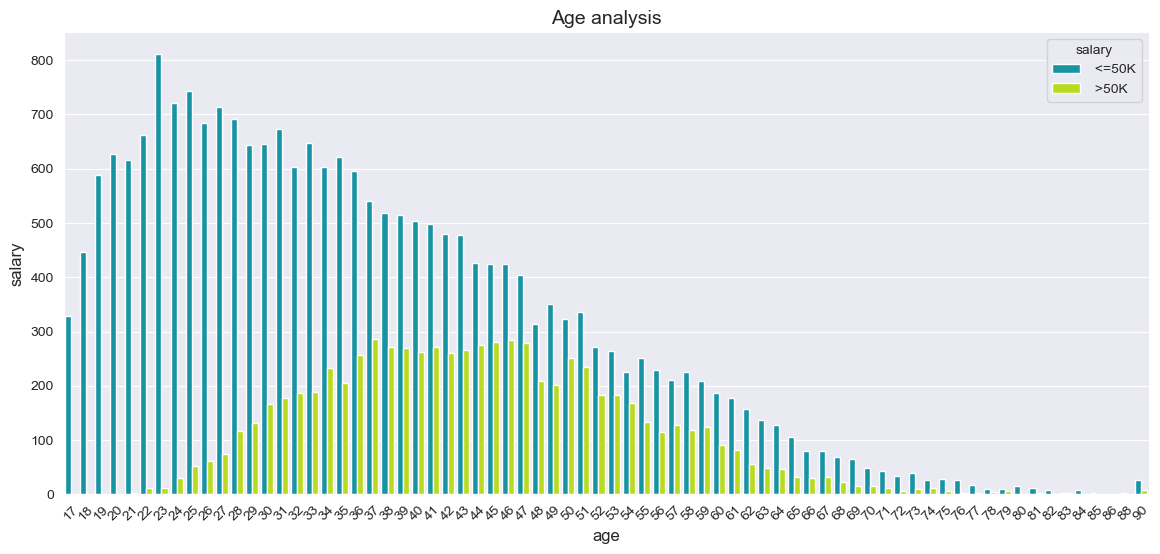

In [76]:
plot_cat(df, 'age', 'age', 'salary', 'Age analysis')

1. We infer that min salary of most of the population is in their 20's which is a valid as it is the starting time of a career
2. Age and Salary are in direct proportion with each other.
3. The data is left skewed as there are a very few people who work after 60's,therefore,the chances of salary being more than 50k is very less.

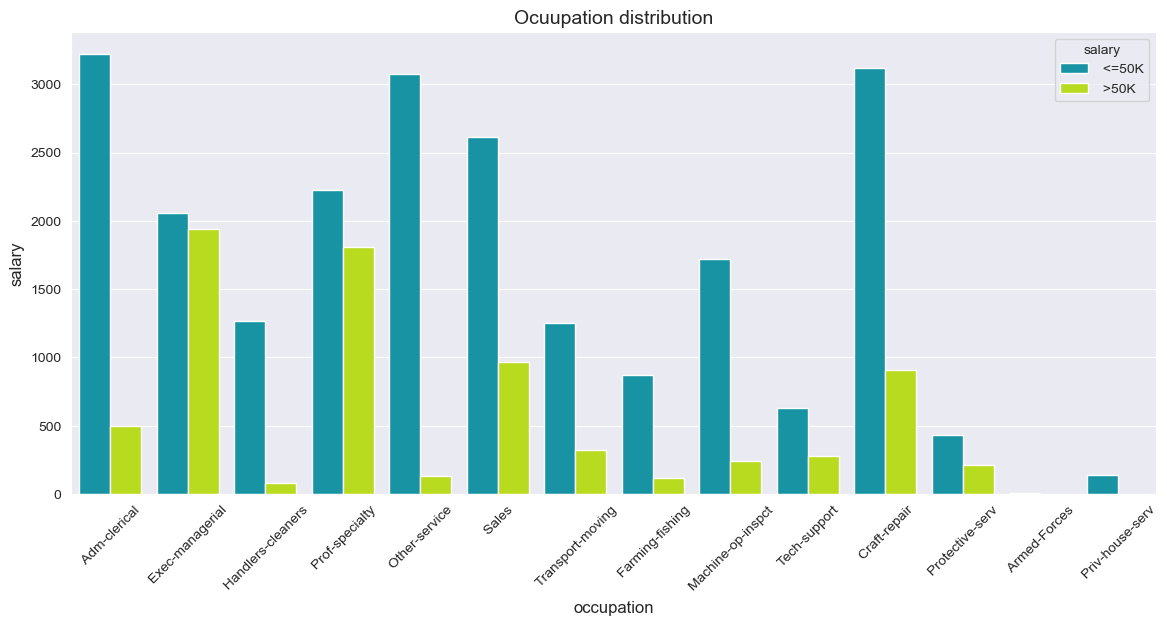

In [77]:
plot_cat(df, 'occupation', 'occupation', 'salary', 'Ocuupation distribution')

1. Population is distributed in all of the occupational fields with minimum in armed forces & maximum in prof-speciality.
2. Being in an executive managerial position gives almost equal chances of getiing a <= or > 50k salary.

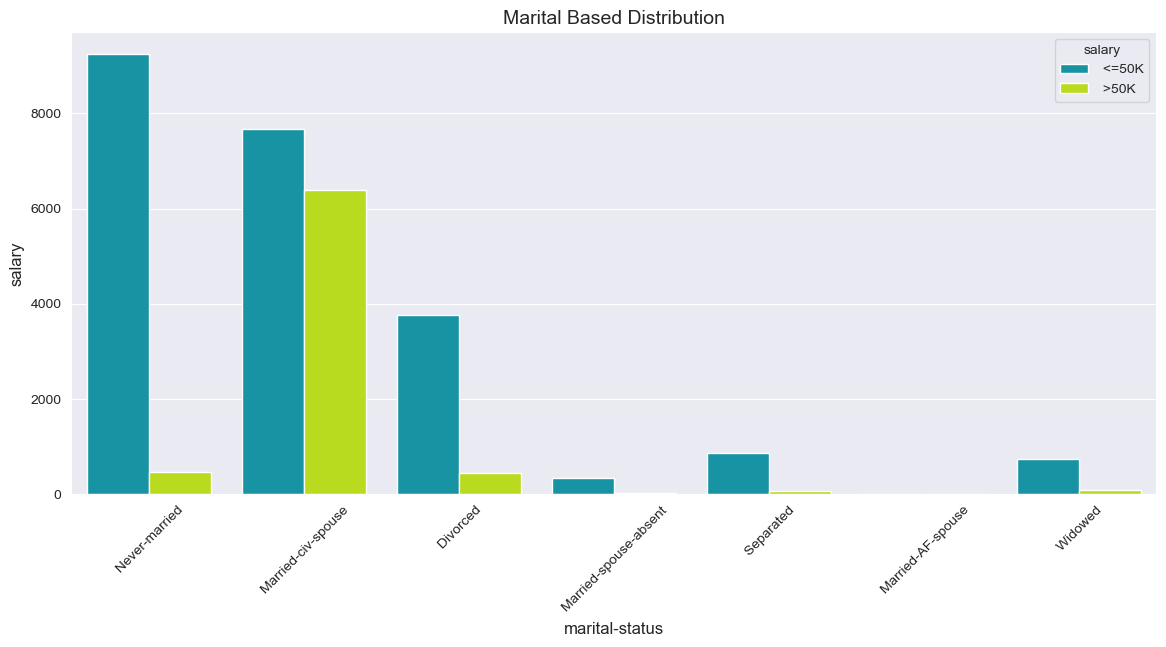

In [78]:
plot_cat(df, 'marital-status','marital-status', 'salary','Marital Based Distribution')

We infer that the population is broadly divided into three groups:

1. Divorced: A divorced person has 90:10 chances of getting <= or > 50 k salary.
2. Married-civ-spouse: A person married to a civillian spouse has 53:47 chances of getting <= or > 50 k salary. People in this domain are almost equal in number.
3. Never-married: A person who has never married has 95:05 chances of getting <= or > 50 k salary. Most of the population is concentrated in this domain.​Another noticable thing is that people who marry a spouse in armed forcues have and equal chance of getting <= or > 50 k salary.

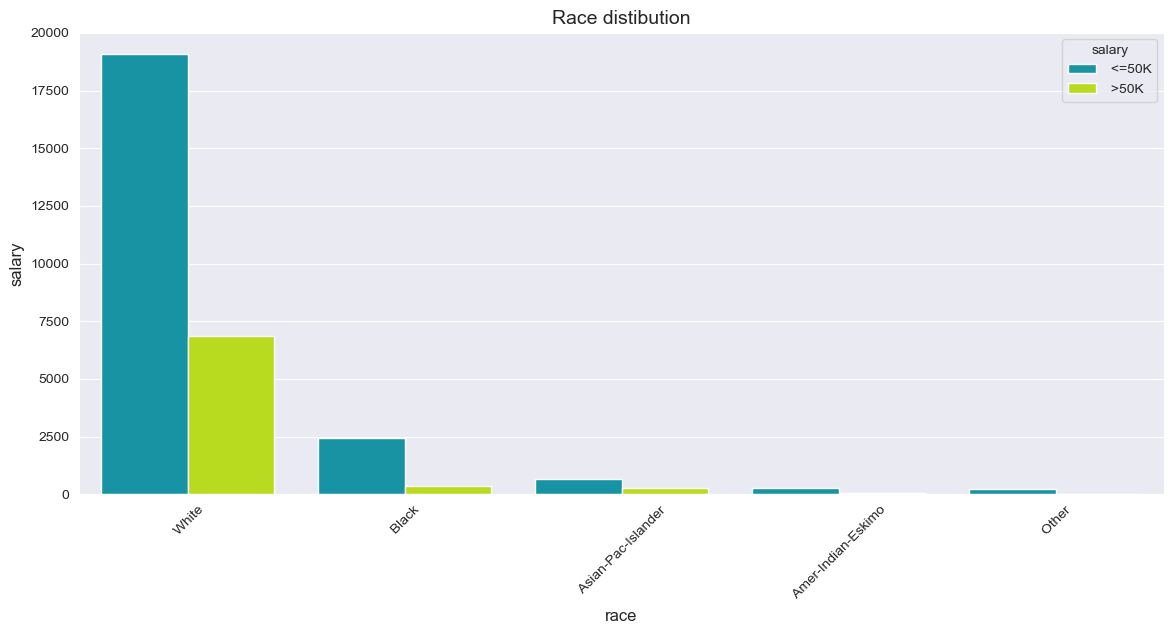

In [79]:
plot_cat(df, 'race', 'race', 'salary', 'Race distibution')

Most of the population is white and has 75:25 chance of getting <= or > 50 k salary.

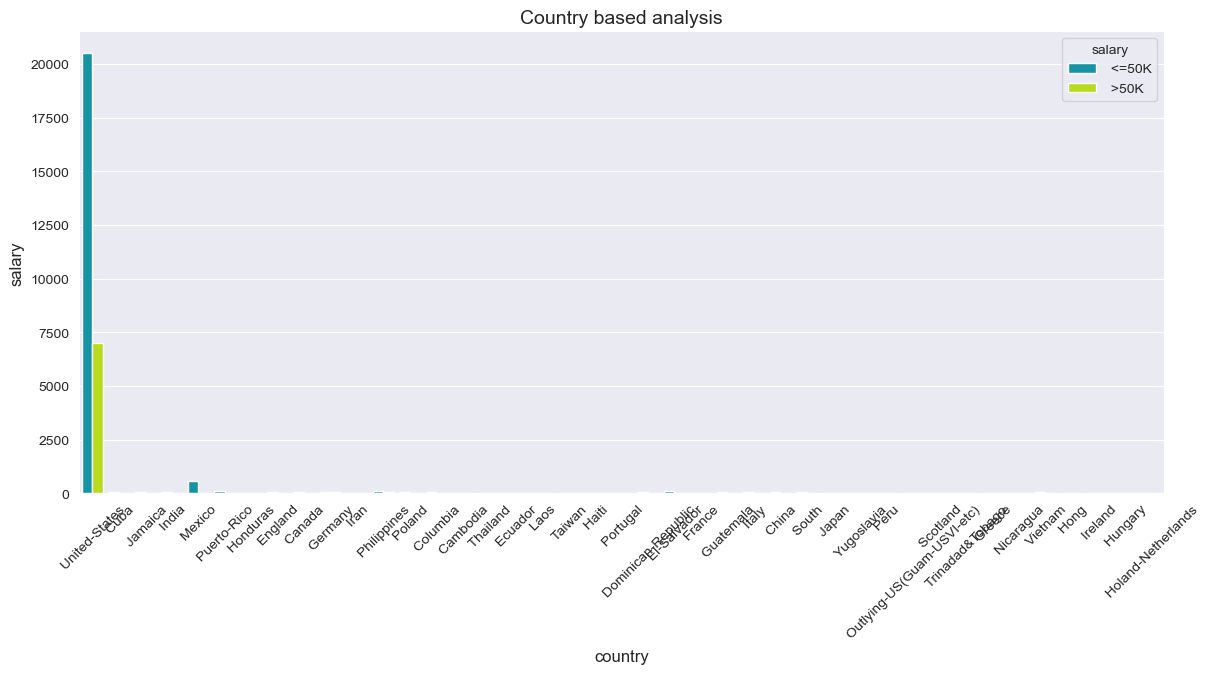

In [80]:
plot_cat(df, 'country', 'country', 'salary', 'Country based analysis')

The only country having max population is United-States where 75:25 is the chance of getting <= or > 50 k salary.

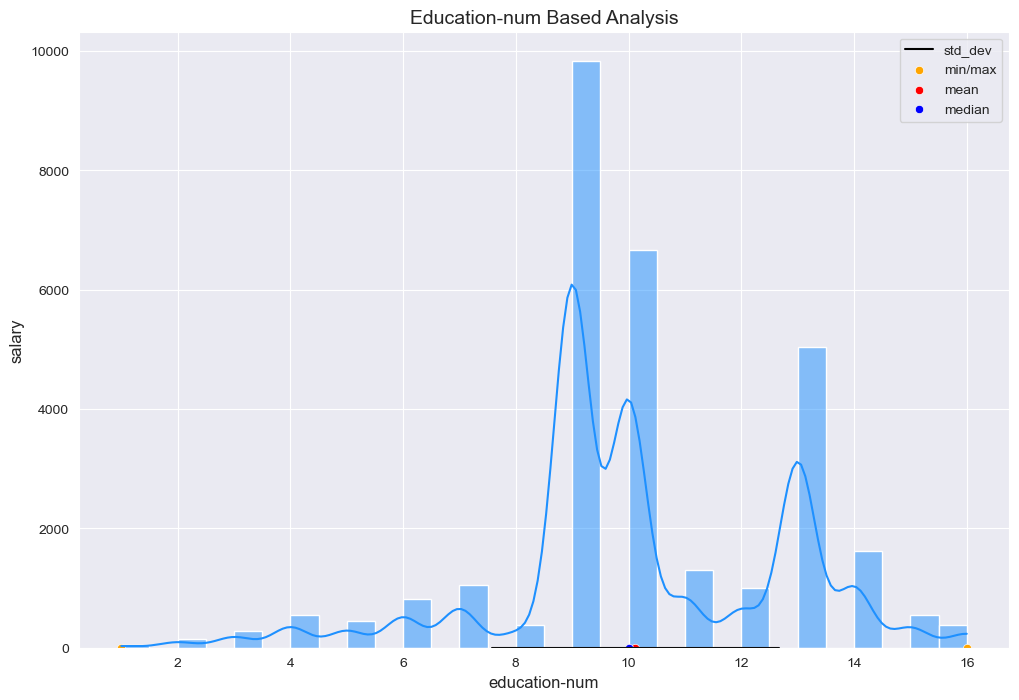

Statistics,Value
Minimum Value,1
Maximum Value,16
Range,15
Mean,10.1225
Median,10
Standard Deviation,2.54874
Skewness,-0.302845
Kurtosis,0.638573


In [81]:
plot_dist(df,'education-num','education-num','salary','Education-num Based Analysis')

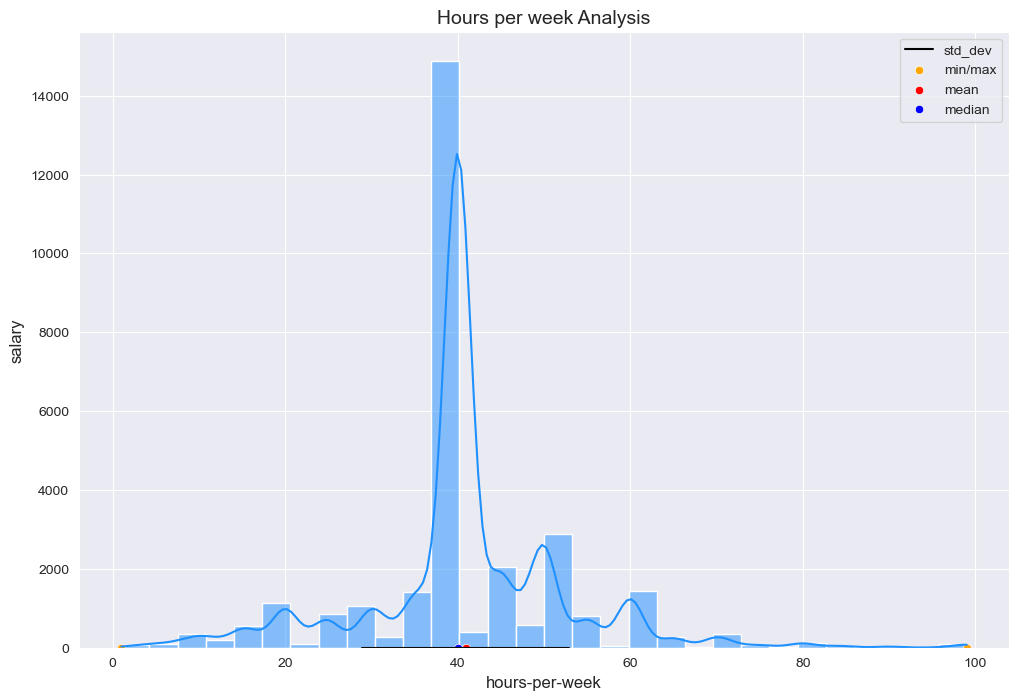

Statistics,Value
Minimum Value,1
Maximum Value,99
Range,98
Mean,40.9347
Median,40
Standard Deviation,11.9788
Skewness,0.332386
Kurtosis,3.16936


In [82]:
plot_dist(df,'hours-per-week','hours-per-week','salary','Hours per week Analysis')

#### Summary:
For getting salary >50k one must lie in the following categories:

* Age : 40-55
* Workclass : Private/Self-Employed
* Education : Bachelors/Masters
* Marital Status : Married-civ-spouse
* Occupation : Exec-manager
* Relationship : Husband/wife
* Race : White
* Gender : Male
* Country : United-States
* Hours per week : >40

### 4. Data Pre-processing
Before we use variables in our model, we need to preprocess them. We will perform the following steps:


##### Grouping and encoding all the categorical columns.

In [83]:
for dataset in [df]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1


for col in df[df.columns]:  # To convert object data by label encoder
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = df.astype(int)
df=df.drop(["education"],axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,0,1,1,1,2174,0,0,1,0
1,50,0,83311,13,2,3,0,1,1,0,0,0,1,0
2,38,1,215646,9,0,5,1,1,1,0,0,0,1,0
3,53,1,234721,7,2,5,0,0,1,0,0,0,1,0
4,28,1,338409,13,2,9,5,0,0,0,0,0,0,0


We dropped the education column because it is same as education-num.

#### Plotting graphs for numerical columns.

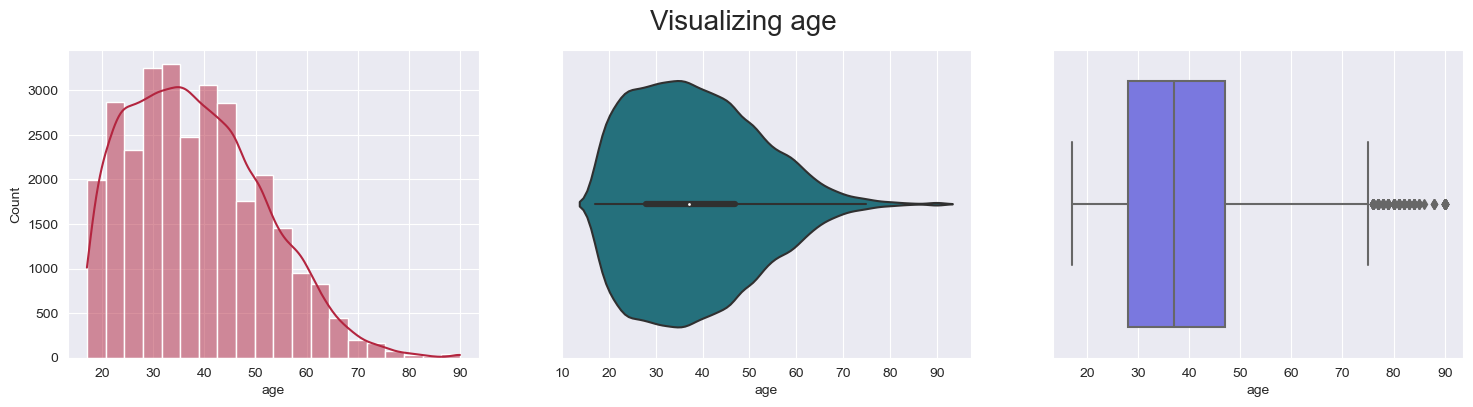

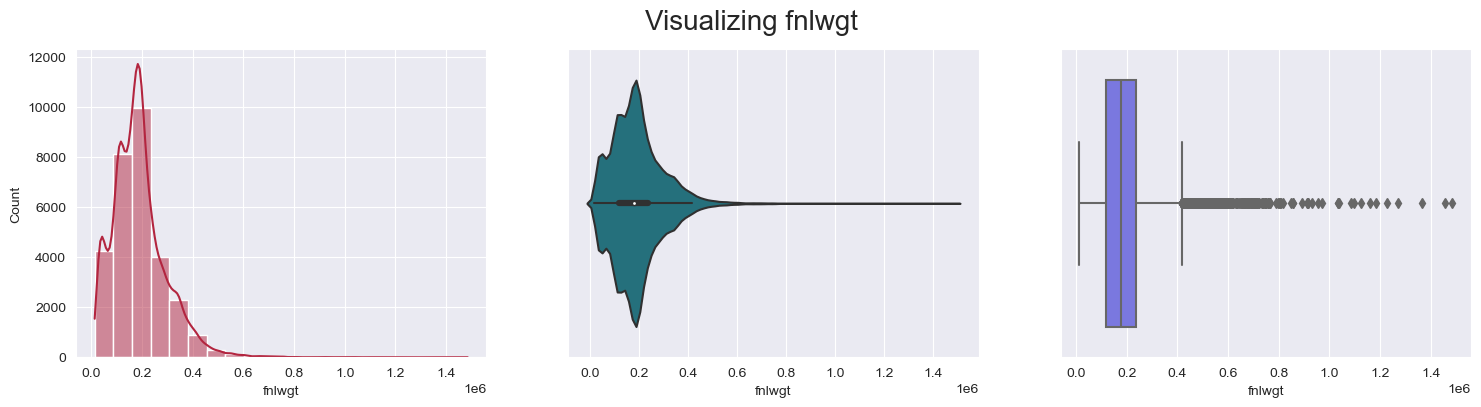

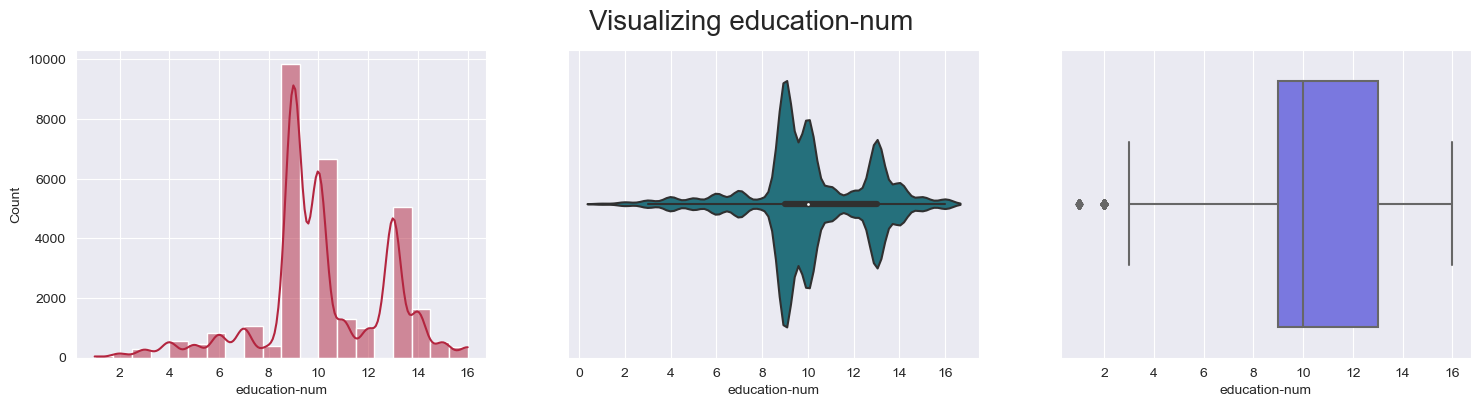

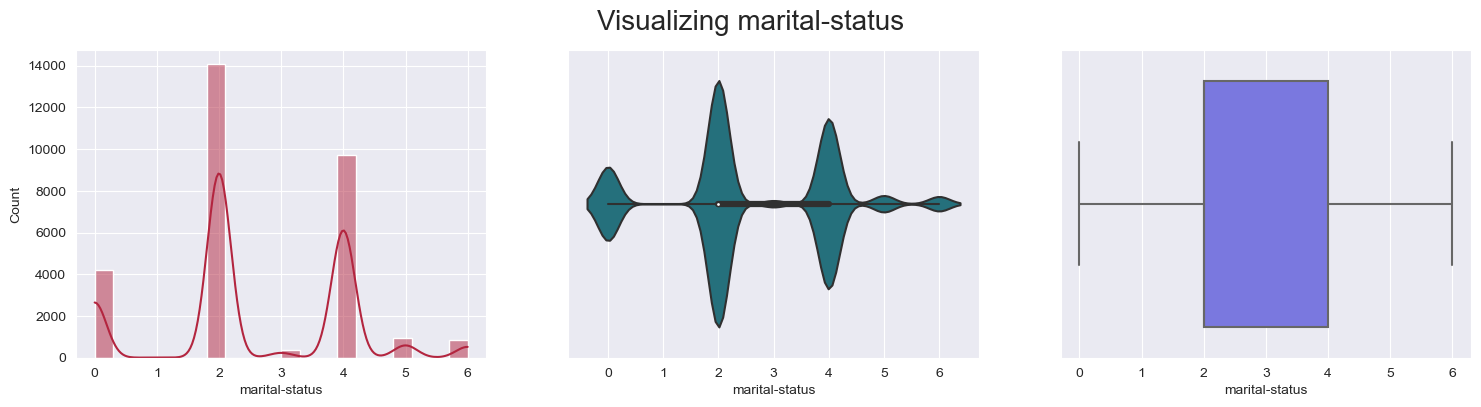

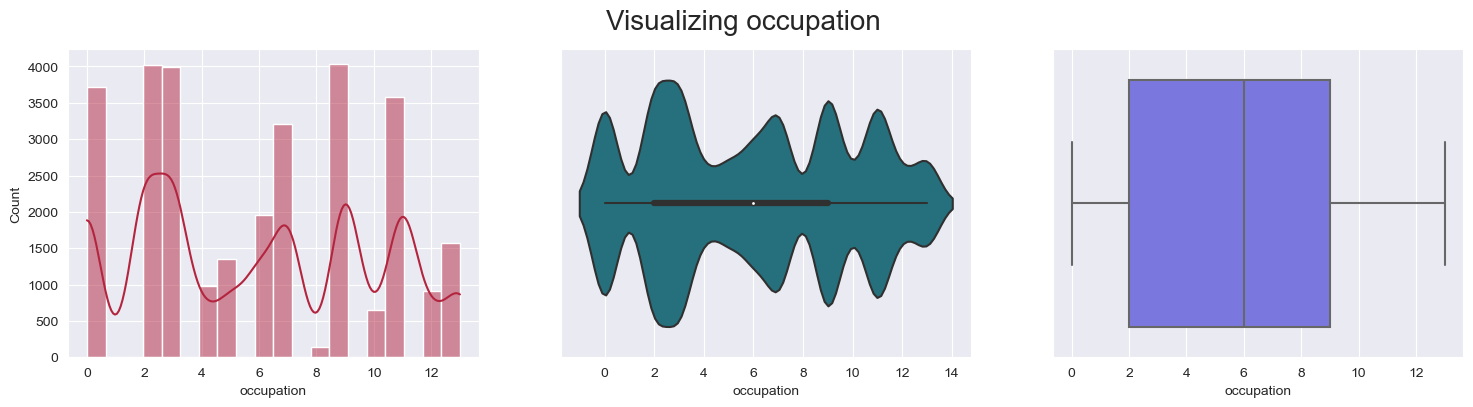

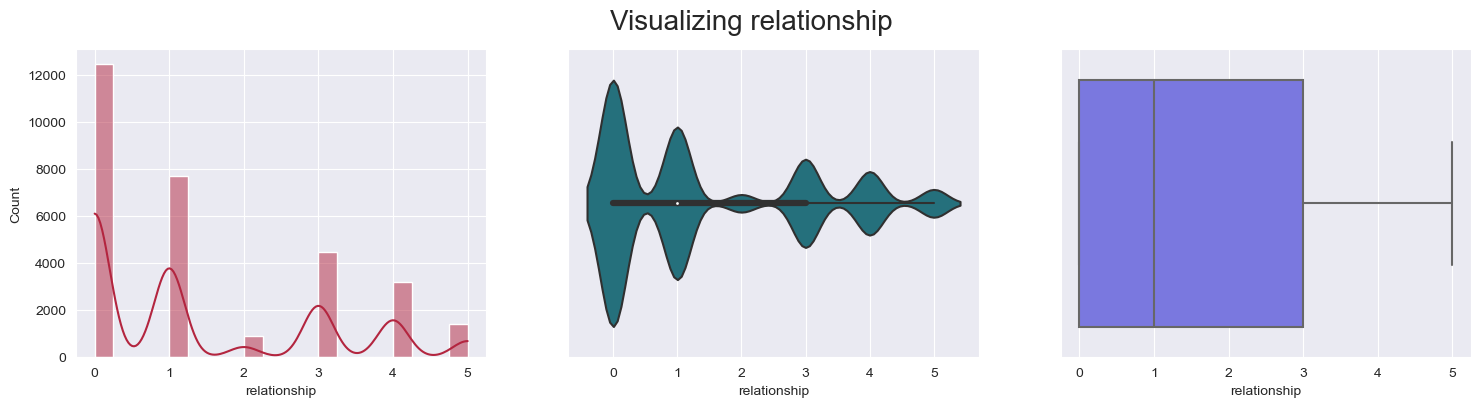

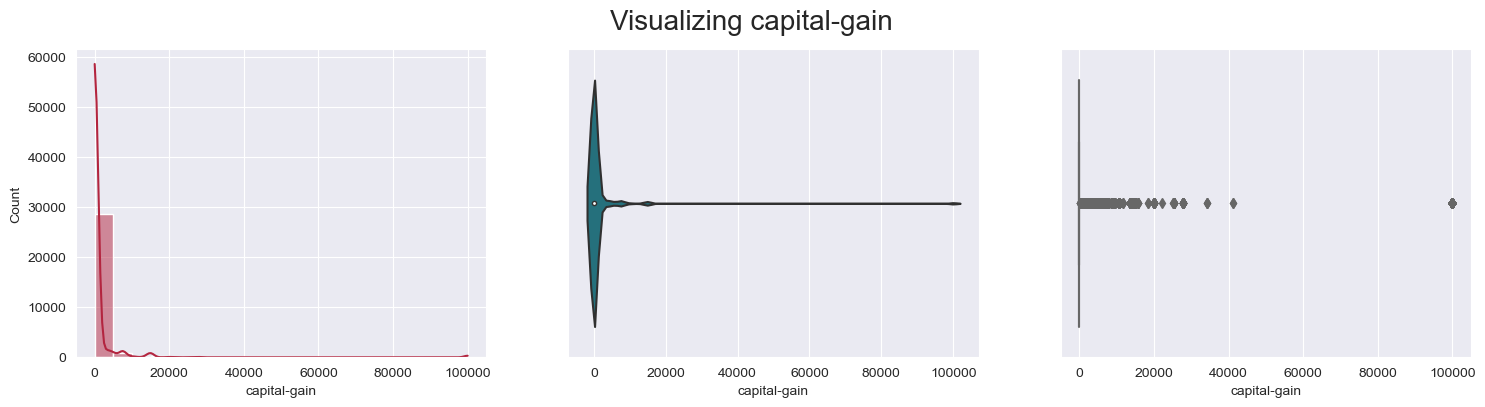

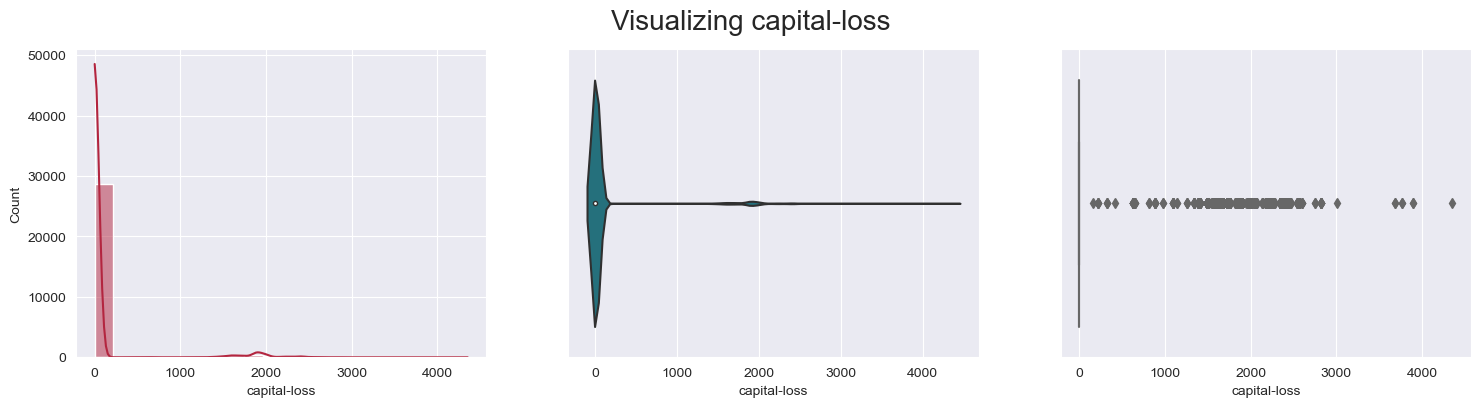

In [84]:
df1=df.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

Left-Skewed Data:

1. Age
2. Fnlwgt

Outliers:

1. Fnlwgt
2. Education-num
3. Capital-gain
4. Capital-loss

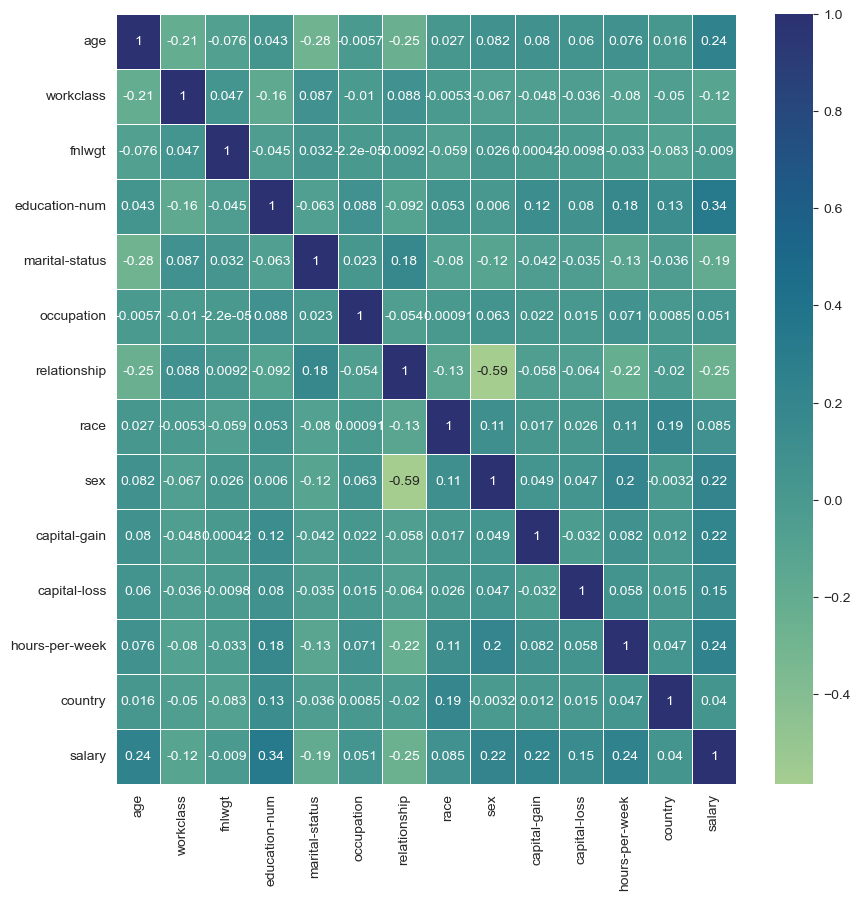

In [85]:
# Function to plot correlation between variables

corr = df.corr()
    #print(corr)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot= True, linewidths = .5, ax=ax, cmap='crest')
plt.show()

## 5.Balancing the dataset

In [86]:
X = df.drop(['salary'], axis=1)
y = df['salary']
y.value_counts(normalize=True)

0    0.750954
1    0.249046
Name: salary, dtype: float64

In [87]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [88]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [89]:
X1,y1 = rs.fit_resample(X, y)
y1.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

Import Model training Libraries

In [108]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

## 6. Train the model

In [93]:
# Let's create a train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31686, 13)
X_test shape: (13580, 13)
y_train shape: (31686,)
y_test shape: (13580,)


In [94]:
# Creaating inistance of logistic regression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_log = log_reg.predict(X_test)
k_log = round(f1_score(y_test, test_predict_log) *100, 4)
k_acc = round(accuracy_score(y_test, test_predict_log) *100, 4)
k_mse = round(mean_absolute_error(y_test, test_predict_log) *100, 4)
print("Test F1 Score :", k_log,"\n Test accuracy Score :", k_acc, "\n Mean Absolute Error :", k_mse)

Test F1 Score : 45.1834 
 Test accuracy Score : 62.2459 
 Mean Absolute Error : 37.7541


In [95]:
# Creaating inistance of KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_knn = knn.predict(X_test)
knn_f1 = round((f1_score(y_test, test_predict_knn)) *100, 4)
knn_acc = round(accuracy_score(y_test, test_predict_knn) *100, 4)
knn_mse = round(mean_absolute_error(y_test, test_predict_knn) *100, 4)
print("F1 Score :", knn_f1,"\n Accuracy Score :", knn_acc, "\n Mean Absolute Error :", knn_mse)

F1 Score : 77.0611 
 Accuracy Score : 74.9632 
 Mean Absolute Error : 25.0368


In [115]:
# Creaating inistance of GaussianNB (Naive Bayes)
nb = GaussianNB()

# Fitting the model
nb.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_nb = nb.predict(X_test)
nb_f1 = round((f1_score(y_test, test_predict_nb)) *100, 4)
nb_acc = round(accuracy_score(y_test, test_predict_nb) *100, 4)
nb_mse = round(mean_absolute_error(y_test, test_predict_nb) *100, 4)
print("F1 Score :", nb_f1,"\n Accuracy Score :", nb_acc, "\n Mean Absolute Error :", nb_mse)

F1 Score : 45.594 
 Accuracy Score : 62.9013 
 Mean Absolute Error : 37.0987


In [96]:
# Creaating inistance of DeciaionTreeClassifier
dt = DecisionTreeClassifier()

# Fitting the model
dt.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_dt = dt.predict(X_test)
dt_f1 = round(f1_score(y_test, test_predict_dt) *100, 4)
dt_acc = round(accuracy_score(y_test, test_predict_dt) *100, 4)
dt_mse = round(mean_absolute_error(y_test, test_predict_dt) *100, 4)
print("F1 Score :", dt_f1,"\n Accuracy Score :", dt_acc, "\n Mean Absolute Error :", dt_mse)

F1 Score : 90.5823 
 Accuracy Score : 90.162 
 Mean Absolute Error : 9.838


In [116]:
# Creaating inistance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

# Fitting the model
rfc.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_rfc = rfc.predict(X_test)
rfc_f1 = round(f1_score(y_test, test_predict_rfc) *100, 4)
rfc_acc = round(accuracy_score(y_test, test_predict_rfc) *100, 4)
rfc_mse = round(mean_absolute_error(y_test, test_predict_rfc) *100, 4)
print("F1 Score :", rfc_f1,"\n Accuracy Score :", rfc_acc, "\n Mean Absolute Error :", rfc_mse)

F1 Score : 92.0065 
 Accuracy Score : 91.701 
 Mean Absolute Error : 8.299


In [98]:
# Creaating inistance of AdaBoostClassifier
ad = AdaBoostClassifier()

# Fitting the model
ad.fit(X_train, y_train)

# Predicting over the test set and claculating F1
test_predict_ad = ad.predict(X_test)
ad_f1 = round(f1_score(y_test, test_predict_ad) *100, 4)
ad_acc = round(accuracy_score(y_test, test_predict_ad) *100, 4)
ad_mse = round(mean_absolute_error(y_test, test_predict_ad) *100, 4)
print("F1 Score :", ad_f1,"\n Accuracy Score :", ad_acc, "\n Mean Absolute Error :", ad_mse)

F1 Score : 82.1974 
 Accuracy Score : 82.0545 
 Mean Absolute Error : 17.9455


In [114]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
fnlwgt,0.190
age,0.182
relationship,0.140
education-num,0.124
marital-status,0.108
capital-gain,0.082
occupation,0.075
hours-per-week,0.028
capital-loss,0.026


### Random forest can be selected as final model with 91.70 % accuracy

In [118]:
import pickle
pickle.dump(rfc, open('model.pkl','wb'))

In [119]:
pickle_model = pickle.load(open('model.pkl','rb'))

## Batch input
pickle_model.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1])

In [126]:
X_test.loc[85]

age                   28
workclass              1
fnlwgt            212563
education-num         10
marital-status         0
occupation             6
relationship           4
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
country                1
Name: 85, dtype: int32

In [127]:
pickle_model.predict([[28,1,212563,10,0,6,4,0,0,0,0,0,1]])[0]

0

In [128]:
X_test.loc[1]

age                  50
workclass             0
fnlwgt            83311
education-num        13
marital-status        2
occupation            3
relationship          0
race                  1
sex                   1
capital-gain          0
capital-loss          0
hours-per-week        0
country               1
Name: 1, dtype: int32

In [129]:
pickle_model.predict([[50,0,83311,13,2,3,0,1,1,0,0,0,1]])[0]

1